In [62]:
#read in combined motorcycle crash data
motorcycle_data <- read.csv("Datasets/statecycle_flag.csv",
                       encoding='latin-1')

In [63]:
#dataset.drop(['MC_PASSNGR_IND', 'MC_DVR_HLMTDOT_IND', 'MC_PAS_HLMTDOT_IND','MINOR_INJURY','MODERATE_INJURY','MAJOR_INJURY'], axis=1, inplace=True)
#dataset <- motorcycle_data[-c('MC_PASSNGR_IND', 'MC_DVR_HLMTDOT_IND', 'MC_PAS_HLMTDOT_IND','MINOR_INJURY','MODERATE_INJURY','MAJOR_INJURY')]
#abbv_cycle_2013 <- cycle_2013[c("CRN","MC_PASSNGR_IND","MC_DVR_HLMTON_IND","MC_DVR_HLMTDOT_IND","MC_DVR_HLMT_TYPE","MC_PAS_HLMTON_IND","MC_PAS_HLMTDOT_IND","MC_PAS_HLMT_TYPE")]

motorcycle_data<-within(motorcycle_data, rm('X','MC_PASSNGR_IND', 'MC_DVR_HLMTDOT_IND', 'MC_PAS_HLMTDOT_IND',
                           'MINOR_INJURY','MODERATE_INJURY','MAJOR_INJURY','CRN', 
                           'FATAL_OR_MAJ_INJ','CRASH_YEAR','COUNTY','MUNICIPALITY','COUNTY_YEAR',
                           'MOTORCYCLE_COUNT','FATAL_COUNT','MCYCLE_DEATH_COUNT','DEC_LAT','DEC_LONG',
                           'PSP_REPORTED','MC_DVR_HLMT_TYPE','MC_PAS_HLMT_TYPE','MC_PAS_HLMTON_IND'))


In [64]:
#one hot encode driver wearing helmet column

for(unique_value in unique(motorcycle_data$MC_DVR_HLMTON_IND)){
motorcycle_data[paste(" MC_DVR_HLMTON_IND", unique_value, sep = ".")] <- ifelse(motorcycle_data$MC_DVR_HLMTON_IND == unique_value, 1, 0)
}


In [65]:
str(motorcycle_data)

'data.frame':	96508 obs. of  90 variables:
 $ MC_DVR_HLMTON_IND   : Factor w/ 4 levels " ","N","U","Y": 1 1 3 3 1 3 1 1 1 1 ...
 $ INTERSTATE          : int  0 0 0 0 0 0 0 0 0 0 ...
 $ STATE_ROAD          : int  1 0 0 0 1 1 1 0 0 1 ...
 $ LOCAL_ROAD          : int  1 1 1 1 0 0 0 1 1 0 ...
 $ LOCAL_ROAD_ONLY     : int  0 1 1 1 0 0 0 1 1 0 ...
 $ TURNPIKE            : int  0 0 0 0 0 0 0 0 0 0 ...
 $ WET_ROAD            : int  1 0 1 0 1 1 1 1 1 0 ...
 $ SNOW_SLUSH_ROAD     : int  0 0 0 0 0 0 0 0 0 0 ...
 $ ICY_ROAD            : int  0 0 0 0 0 0 0 0 0 0 ...
 $ SUDDEN_DEER         : int  0 0 0 0 0 0 0 0 0 0 ...
 $ SHLDR_RELATED       : int  0 0 0 0 0 0 0 0 0 0 ...
 $ REAR_END            : int  0 0 0 0 0 0 0 0 1 1 ...
 $ HO_OPPDIR_SDSWP     : int  0 0 0 0 0 0 0 0 0 0 ...
 $ HIT_FIXED_OBJECT    : int  0 0 1 0 0 1 0 0 0 0 ...
 $ SV_RUN_OFF_RD       : int  0 0 1 1 0 1 0 0 0 0 ...
 $ WORK_ZONE           : int  0 0 0 0 0 0 0 0 0 0 ...
 $ PROPERTY_DAMAGE_ONLY: int  0 0 0 0 0 0 0 0 0 0 ...
 $ INJUR

In [66]:
#remove original driver wearing helmet column
motorcycle_data<-within(motorcycle_data, rm('MC_DVR_HLMTON_IND'))


In [67]:
#Choose columns from crash feature selection analysis
select_data <- motorcycle_data[c('FATAL','PHANTOM_VEHICLE','ALCOHOL_RELATED','LIMIT_65MPH','HAZARDOUS_TRUCK','DRUGGED_DRIVER')]
str(select_data)

'data.frame':	96508 obs. of  6 variables:
 $ FATAL          : int  0 0 0 0 0 0 0 0 0 0 ...
 $ PHANTOM_VEHICLE: int  0 0 0 0 0 0 0 0 0 0 ...
 $ ALCOHOL_RELATED: int  0 0 0 0 0 1 0 0 0 0 ...
 $ LIMIT_65MPH    : int  0 0 0 0 0 0 0 0 0 0 ...
 $ HAZARDOUS_TRUCK: int  0 0 0 0 0 0 0 0 0 0 ...
 $ DRUGGED_DRIVER : int  0 0 0 0 0 0 0 0 0 0 ...


In [68]:
#select_data <- select_data[!apply(select_data, 1, function(x) any(x=="")),] 
#str(select_data)
    
select_data <-select_data[apply(select_data, 1, function(x) any(x != '')), ]
str(select_data)    

'data.frame':	96508 obs. of  6 variables:
 $ FATAL          : int  0 0 0 0 0 0 0 0 0 0 ...
 $ PHANTOM_VEHICLE: int  0 0 0 0 0 0 0 0 0 0 ...
 $ ALCOHOL_RELATED: int  0 0 0 0 0 1 0 0 0 0 ...
 $ LIMIT_65MPH    : int  0 0 0 0 0 0 0 0 0 0 ...
 $ HAZARDOUS_TRUCK: int  0 0 0 0 0 0 0 0 0 0 ...
 $ DRUGGED_DRIVER : int  0 0 0 0 0 0 0 0 0 0 ...


In [69]:
select <- cor(select_data)
round(select, 2)

,FATAL,PHANTOM_VEHICLE,ALCOHOL_RELATED,LIMIT_65MPH,HAZARDOUS_TRUCK,DRUGGED_DRIVER
FATAL,1.00,-0.01,0.19,0.01,0.03,0.12
PHANTOM_VEHICLE,-0.01,1.00,-0.03,0.00,0.00,-0.01
ALCOHOL_RELATED,0.19,-0.03,1.00,-0.01,0.00,0.17
LIMIT_65MPH,0.01,0.00,-0.01,1.00,0.00,0.00
HAZARDOUS_TRUCK,0.03,0.00,0.00,0.00,1.00,0.00
DRUGGED_DRIVER,0.12,-0.01,0.17,0.00,0.00,1.00


In [70]:
#correlation score for selected data
cor(select, method = "pearson", use = "complete.obs")


,FATAL,PHANTOM_VEHICLE,ALCOHOL_RELATED,LIMIT_65MPH,HAZARDOUS_TRUCK,DRUGGED_DRIVER
FATAL,1.00000000,-0.2983695,0.14251492,-0.2539668,-0.2278451,-0.01257574
PHANTOM_VEHICLE,-0.29836950,1.0000000,-0.33425356,-0.1886150,-0.2007031,-0.27957890
ALCOHOL_RELATED,0.14251492,-0.3342536,1.00000000,-0.3025426,-0.2708807,0.09530466
LIMIT_65MPH,-0.25396682,-0.1886150,-0.30254259,1.0000000,-0.1994725,-0.27198716
HAZARDOUS_TRUCK,-0.22784506,-0.2007031,-0.27088073,-0.1994725,1.0000000,-0.26370532
DRUGGED_DRIVER,-0.01257574,-0.2795789,0.09530466,-0.2719872,-0.2637053,1.00000000


In [71]:
cor.mtest <- function(mat, ...) {
    mat <- as.matrix(mat)
    n <- ncol(mat)
    p.mat<- matrix(NA, n, n)
    diag(p.mat) <- 0
    for (i in 1:(n - 1)) {
        for (j in (i + 1):n) {
            tmp <- cor.test(mat[, i], mat[, j], ...)
            p.mat[i, j] <- p.mat[j, i] <- tmp$p.value
        }
    }
  colnames(p.mat) <- rownames(p.mat) <- colnames(mat)
  p.mat
}
# matrix of the p-value of the correlation
p.mat <- cor.mtest(select)


In [94]:
sum(select_data$ALCOHOL_RELATED)

sum(select_data$DRUGGED_DRIVER)

sum(select_data$PHANTOM_VEHICLE)

sum(select_data$LIMIT_65MPH)

sum(select_data$HAZARDOUS_TRUCK)


[1] 8586

[1] 1038

[1] 1453

[1] 1105

[1] 33

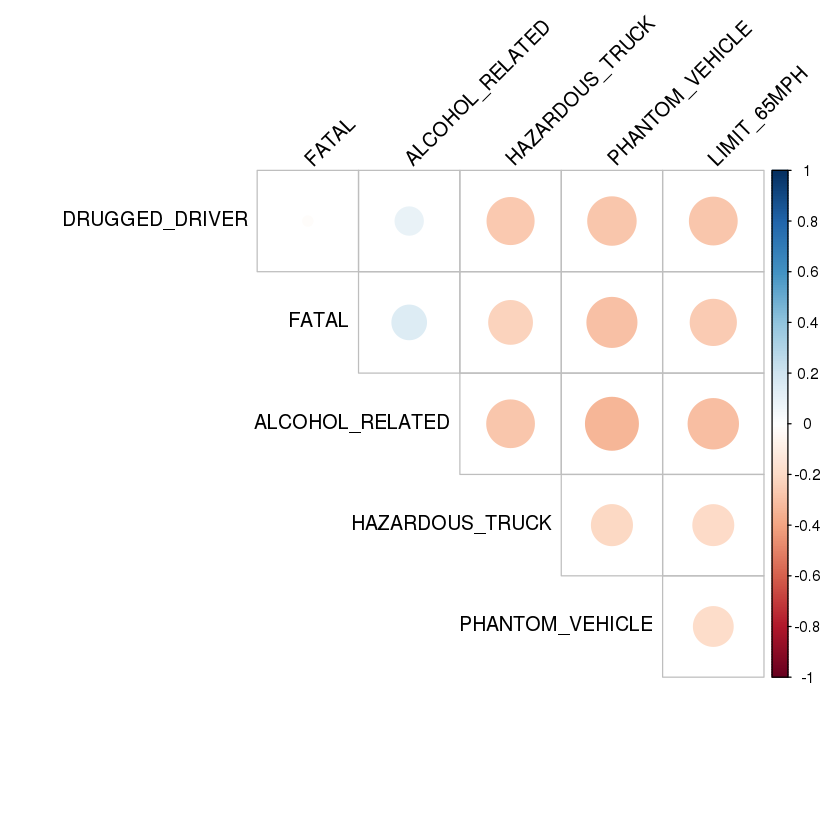

In [73]:
library(corrplot)
corrplot(cor(select, use = "complete"), type = "upper", order = "hclust", diag=FALSE,
  tl.col = "black", tl.srt = 45)

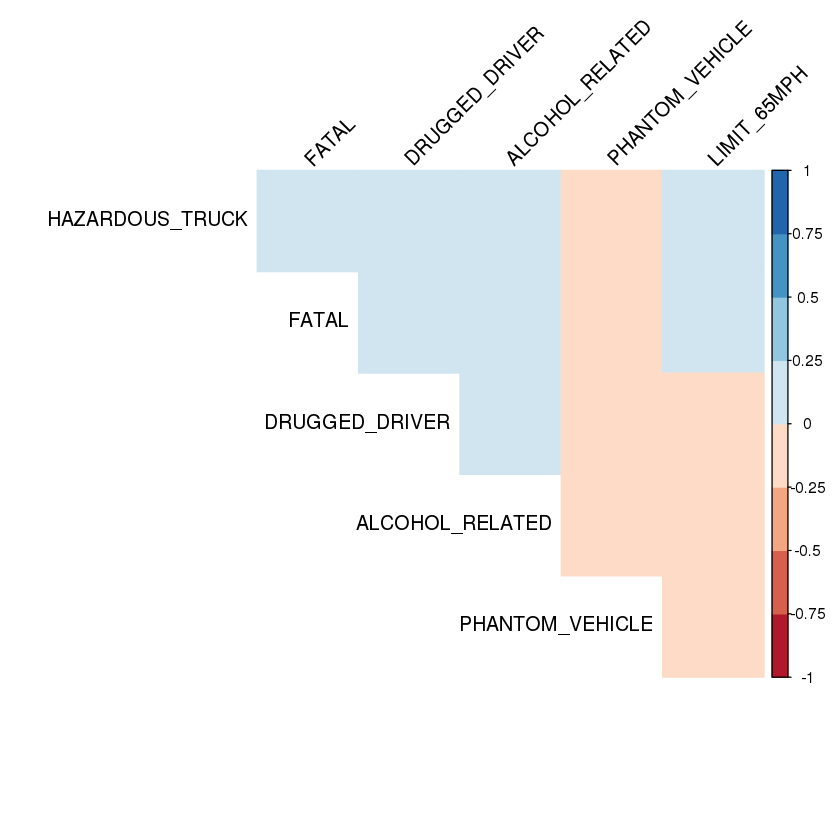

In [74]:
library(RColorBrewer)
#col <- colorRampPalette(c("#BB4444", "#EE9988", "#FFFFFF", "#77AADD", "#4477AA"))
corrplot(select,method="color", col=brewer.pal(n=8, name="RdBu"),  
         type="upper", order="AOE", 
         #addCoef.col = "black", # Add coefficient of correlation
         tl.col="black", tl.srt=45, #Text label color and rotation
         # Combine with significance
         #p.mat = p.mat, sig.level = 0.01, insig = "p-value", 
         # hide correlation coefficient on the principal diagonal
         diag=FALSE
         )


#correlation plot for selected data
library(corrplot)
corrplot(select, type = "upper", order = "hclust", 
         tl.col = "black", tl.srt = 45)

In [75]:
#set up data for correlation
cycle <- cor(motorcycle_data)
round(cycle, 2)

,INTERSTATE,STATE_ROAD,LOCAL_ROAD,LOCAL_ROAD_ONLY,TURNPIKE,WET_ROAD,SNOW_SLUSH_ROAD,ICY_ROAD,SUDDEN_DEER,SHLDR_RELATED,⋯,MC_DRINKING_DRIVER,DRUG_RELATED,ILLEGAL_DRUG_RELATED,SCHOOL_BUS_UNIT,DRUGGED_DRIVER,IMPAIRED_DRIVER,MC_DVR_HLMTON_IND.,MC_DVR_HLMTON_IND.U,MC_DVR_HLMTON_IND.N,MC_DVR_HLMTON_IND.Y
INTERSTATE,1.00,0.12,-0.18,-0.12,-0.01,0.00,0.00,0.00,0.01,0.00,,-0.01,0.00,0.00,-0.01,0.00,-0.01,-0.10,-0.01,0.01,0.12
STATE_ROAD,0.12,1.00,-0.65,-0.99,-0.08,-0.02,0.00,-0.01,0.07,0.01,,0.04,0.02,0.01,0.00,0.02,0.05,-0.28,0.08,0.06,0.18
LOCAL_ROAD,-0.18,-0.65,1.00,0.66,-0.07,0.02,0.00,0.00,-0.14,-0.02,,-0.08,-0.02,-0.01,0.01,-0.02,-0.08,0.31,-0.08,-0.07,-0.21
LOCAL_ROAD_ONLY,-0.12,-0.99,0.66,1.00,-0.05,0.02,0.01,0.01,-0.07,-0.01,,-0.04,-0.02,-0.01,0.00,-0.02,-0.05,0.29,-0.08,-0.06,-0.19
TURNPIKE,-0.01,-0.08,-0.07,-0.05,1.00,0.03,0.00,0.00,0.01,0.00,,-0.01,-0.01,0.00,0.00,-0.01,-0.01,-0.04,0.01,-0.01,0.04
WET_ROAD,0.00,-0.02,0.02,0.02,0.03,1.00,-0.01,-0.01,-0.02,0.00,,0.00,0.00,0.00,0.00,-0.01,0.00,0.06,-0.02,-0.03,-0.03
SNOW_SLUSH_ROAD,0.00,0.00,0.00,0.01,0.00,-0.01,1.00,0.00,0.00,0.00,,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.00,-0.01,-0.01
ICY_ROAD,0.00,-0.01,0.00,0.01,0.00,-0.01,0.00,1.00,-0.01,0.00,,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,-0.01,0.00
SUDDEN_DEER,0.01,0.07,-0.14,-0.07,0.01,-0.02,0.00,-0.01,1.00,-0.01,,-0.01,-0.01,-0.01,-0.01,-0.01,-0.02,-0.12,0.01,0.02,0.10
SHLDR_RELATED,0.00,0.01,-0.02,-0.01,0.00,0.00,0.00,0.00,-0.01,1.00,,0.01,0.00,0.00,0.00,0.00,0.01,-0.03,0.01,0.00,0.02


In [76]:
#check correlation for all data
cor(cycle, method = "pearson", use = "complete.obs")


,INTERSTATE,STATE_ROAD,LOCAL_ROAD,LOCAL_ROAD_ONLY,TURNPIKE,WET_ROAD,SNOW_SLUSH_ROAD,ICY_ROAD,SUDDEN_DEER,SHLDR_RELATED,⋯,MC_DRINKING_DRIVER,DRUG_RELATED,ILLEGAL_DRUG_RELATED,SCHOOL_BUS_UNIT,DRUGGED_DRIVER,IMPAIRED_DRIVER,MC_DVR_HLMTON_IND.,MC_DVR_HLMTON_IND.U,MC_DVR_HLMTON_IND.N,MC_DVR_HLMTON_IND.Y
INTERSTATE,1.000000000,0.348244740,-0.432002299,-0.35604004,0.112677931,-0.0363177864,-0.0168734335,-0.0024260463,0.068538676,0.007234226,,0.006510069,-0.0349130290,-0.034431590,-0.0411941502,-0.0273692911,-0.007239327,-0.31538471,0.095537176,0.091786177,0.349444073
STATE_ROAD,0.348244740,1.000000000,-0.832609583,-0.99678401,0.009931457,-0.1057613590,-0.0309096201,-0.0200346949,0.187008537,0.043842130,,0.172566531,0.0585763059,0.036325164,-0.0306303217,0.0740815841,0.167262454,-0.59660945,0.301076441,0.258699968,0.487531297
LOCAL_ROAD,-0.432002299,-0.832609583,1.000000000,0.84345995,-0.168958987,0.1094092369,0.0256969791,0.0014754512,-0.299115992,-0.091575823,,-0.271303935,-0.0768958966,-0.044867848,0.0511840468,-0.0956918418,-0.252390168,0.68302477,-0.333224120,-0.313999550,-0.557839569
LOCAL_ROAD_ONLY,-0.356040042,-0.996784011,0.843459954,1.00000000,-0.090005481,0.1021864748,0.0324811457,0.0200305257,-0.189070891,-0.044379780,,-0.169533272,-0.0545237907,-0.032751985,0.0329817214,-0.0701881624,-0.163305059,0.60438849,-0.304076278,-0.258266902,-0.497268732
TURNPIKE,0.112677931,0.009931457,-0.168958987,-0.09000548,1.000000000,0.0389572350,-0.0210958958,-0.0053676761,0.033344141,0.001721118,,-0.032143468,-0.0474445219,-0.042460644,-0.0300439065,-0.0448838720,-0.043483855,-0.12095951,0.046883118,0.006551893,0.142553901
WET_ROAD,-0.036317786,-0.105761359,0.109409237,0.10218647,0.038957235,1.0000000000,-0.0158803977,-0.0241945896,-0.073498381,-0.020593035,,-0.047113090,-0.0381866189,-0.030725778,-0.0031664335,-0.0460391238,-0.045767905,0.18614884,-0.105122597,-0.107947798,-0.123447622
SNOW_SLUSH_ROAD,-0.016873434,-0.030909620,0.025696979,0.03248115,-0.021095896,-0.0158803977,1.0000000000,-0.0115319146,-0.021017145,-0.019187869,,-0.044644383,-0.0256554067,-0.020121221,-0.0156663179,-0.0295515924,-0.044146391,0.06791614,-0.027890089,-0.049616812,-0.048682206
ICY_ROAD,-0.002426046,-0.020034695,0.001475451,0.02003053,-0.005367676,-0.0241945896,-0.0115319146,1.0000000000,-0.017468583,-0.003419628,,-0.036172580,-0.0333169178,-0.030163776,-0.0190495326,-0.0338067045,-0.040063931,0.01272635,0.004514726,-0.031034242,-0.004586336
SUDDEN_DEER,0.068538676,0.187008537,-0.299115992,-0.18907089,0.033344141,-0.0734983814,-0.0210171454,-0.0174685830,1.000000000,-0.007079118,,-0.026285249,-0.0515097239,-0.040238331,-0.0386032644,-0.0478176006,-0.040570763,-0.22177281,0.076394549,0.055799601,0.242341200
SHLDR_RELATED,0.007234226,0.043842130,-0.091575823,-0.04437978,0.001721118,-0.0205930345,-0.0191878687,-0.0034196282,-0.007079118,1.000000000,,0.028794388,-0.0169316013,-0.021302248,-0.0274672095,-0.0144221578,0.017980742,-0.08094091,0.037489292,0.020812344,0.078714823


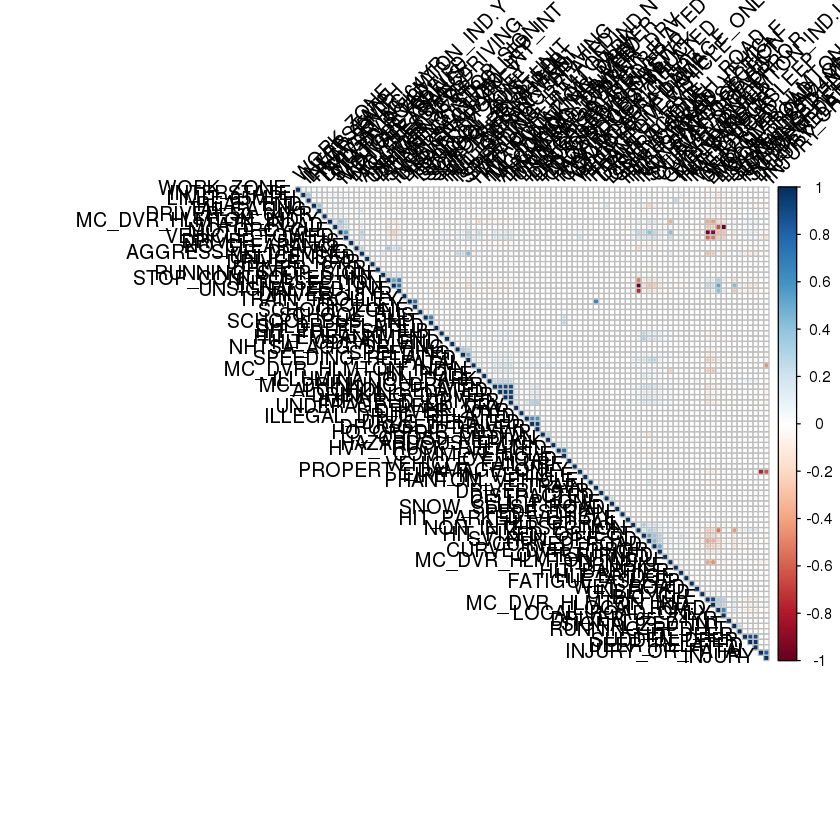

In [77]:
library(corrplot)
corrplot(cycle, type = "upper", order = "hclust", 
         tl.col = "black", tl.srt = 45)

In [78]:
table(select_data$FATAL)



    0     1 
92761  3747 

In [79]:
#create equal sample size of fatal and nonfatals
input_ones <- select_data[which(select_data$FATAL == 1), ]  # all 1's
input_zeros <- select_data[which(select_data$FATAL == 0), ]  # all 0's
set.seed(100)  # for repeatability of samples
input_ones_training_rows <- sample(1:nrow(input_ones), 0.7*nrow(input_ones))  # 1's for training
input_zeros_training_rows <- sample(1:nrow(input_zeros), 0.7*nrow(input_ones))  # 0's for training. Pick as many 0's as 1's
training_ones <- input_ones[input_ones_training_rows, ]  
training_zeros <- input_zeros[input_zeros_training_rows, ]
trainingData <- rbind(training_ones, training_zeros)  # row bind the 1's and 0's 

# Create Test Data
test_ones <- input_ones[-input_ones_training_rows, ]
test_zeros <- input_zeros[-input_zeros_training_rows, ]
testData <- rbind(test_ones, test_zeros)  # row bind the 1's and 0's 


In [80]:
logitMod <- glm(FATAL ~ PHANTOM_VEHICLE + ALCOHOL_RELATED + LIMIT_65MPH + HAZARDOUS_TRUCK + DRUGGED_DRIVER, data=trainingData, family=binomial(link="logit"))

predicted <- plogis(predict(logitMod, testData))  # predicted scores
# or
#predicted <- predict(logitMod, testData, type="response")  # predicted scores

In [81]:
summary(logitMod)


Call:
glm(formula = FATAL ~ PHANTOM_VEHICLE + ALCOHOL_RELATED + LIMIT_65MPH + 
    HAZARDOUS_TRUCK + DRUGGED_DRIVER, family = binomial(link = "logit"), 
    data = trainingData)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.7225  -0.9981  -0.4988   1.3680   1.3680  

Coefficients:
                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)      -0.43756    0.03281 -13.334   <2e-16 ***
PHANTOM_VEHICLE   0.00921    0.25963   0.035   0.9717    
ALCOHOL_RELATED   1.91817    0.08576  22.367   <2e-16 ***
LIMIT_65MPH       0.79231    0.26879   2.948   0.0032 ** 
HAZARDOUS_TRUCK  13.37080  190.90946   0.070   0.9442    
DRUGGED_DRIVER    2.20053    0.26128   8.422   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 7269.7  on 5243  degrees of freedom
Residual deviance: 6443.0  on 5238  degrees of freedom
AIC: 6455

Number of Fisher Scoring iterations: 12

In [82]:
varImp(logitMod)

,Overall
PHANTOM_VEHICLE,0.03547294
ALCOHOL_RELATED,22.36657053
LIMIT_65MPH,2.94773223
HAZARDOUS_TRUCK,0.07003740
DRUGGED_DRIVER,8.42221261


In [83]:
library(caret)
predicted<-ifelse(predicted> 0.5,1,0)
cm<- confusionMatrix(testData$FATAL, predicted)
cm$table

          Reference
Prediction     0     1
         0 81768  8371
         1   674   451

In [84]:
draw_confusion_matrix <- function(cm) {

  layout(matrix(c(1,1,2)))
  par(mar=c(2,2,2,2))
  plot(c(100, 345), c(300, 450), type = "n", xlab="", ylab="", xaxt='n', yaxt='n')
  title('Motorcycle Fatalities', cex.main=2)

  # create the matrix 
  rect(150, 430, 240, 370, col='#7c0d18')
  text(195, 435, 'Fatality', cex=1.2)
  rect(250, 430, 340, 370, col='#4ebce8')
  text(295, 435, 'No Fatality', cex=1.2)
  text(125, 370, 'Predicted', cex=1.3, srt=90, font=2)
  text(245, 450, 'Actual', cex=1.3, font=2)
  rect(150, 305, 240, 365, col='#4ebce8')
  rect(250, 305, 340, 365, col='#7c0d18')
  text(140, 400, 'Fatality', cex=1.2, srt=90)
  text(140, 335, 'No Fatality', cex=1.2, srt=90)

  # add in the cm results 
  res <- as.numeric(cm$table)
  text(195, 400, res[1], cex=1.6, font=2, col='white')
  text(195, 335, res[2], cex=1.6, font=2, col='white')
  text(295, 400, res[3], cex=1.6, font=2, col='white')
  text(295, 335, res[4], cex=1.6, font=2, col='white')

  # add in the specifics 
  plot(c(100, 0), c(100, 0), type = "n", xlab="", ylab="", main = "DETAILS", xaxt='n', yaxt='n')
  text(10, 85, names(cm$byClass[1]), cex=1.2, font=2)
  text(10, 70, round(as.numeric(cm$byClass[1]), 3), cex=1.2)
  text(30, 85, names(cm$byClass[2]), cex=1.2, font=2)
  text(30, 70, round(as.numeric(cm$byClass[2]), 3), cex=1.2)
  text(50, 85, names(cm$byClass[5]), cex=1.2, font=2)
  text(50, 70, round(as.numeric(cm$byClass[5]), 3), cex=1.2)
  text(70, 85, names(cm$byClass[6]), cex=1.2, font=2)
  text(70, 70, round(as.numeric(cm$byClass[6]), 3), cex=1.2)
  text(90, 85, names(cm$byClass[7]), cex=1.2, font=2)
  text(90, 70, round(as.numeric(cm$byClass[7]), 3), cex=1.2)

  # add in the accuracy information 
  text(30, 35, names(cm$overall[1]), cex=1.5, font=2)
  text(30, 20, round(as.numeric(cm$overall[1]), 3), cex=1.4)
  text(70, 35, names(cm$overall[2]), cex=1.5, font=2)
  text(70, 20, round(as.numeric(cm$overall[2]), 3), cex=1.4)
}  

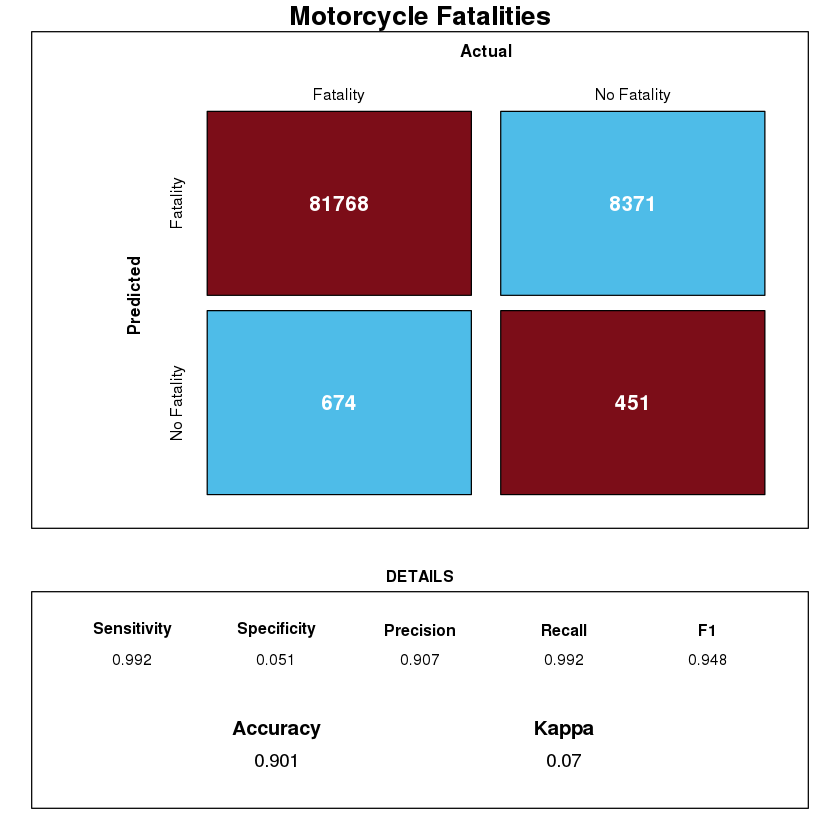

In [85]:
draw_confusion_matrix(cm)


In [86]:
select_data2 <- motorcycle_data[c('FATAL','ALCOHOL_RELATED','DRUGGED_DRIVER')]
head(select_data2)

FATAL,ALCOHOL_RELATED,DRUGGED_DRIVER
0,0,0
0,0,0
0,0,0
0,0,0
0,0,0
0,1,0


In [87]:
#create equal sample size of fatal and nonfatals
input_ones <- select_data[which(select_data2$FATAL == 1), ]  # all 1's
input_zeros <- select_data[which(select_data2$FATAL == 0), ]  # all 0's
set.seed(100)  # for repeatability of samples
input_ones_training_rows <- sample(1:nrow(input_ones), 0.7*nrow(input_ones))  # 1's for training
input_zeros_training_rows <- sample(1:nrow(input_zeros), 0.7*nrow(input_ones))  # 0's for training. Pick as many 0's as 1's
training_ones <- input_ones[input_ones_training_rows, ]  
training_zeros <- input_zeros[input_zeros_training_rows, ]
trainingData <- rbind(training_ones, training_zeros)  # row bind the 1's and 0's 

# Create Test Data
test_ones <- input_ones[-input_ones_training_rows, ]
test_zeros <- input_zeros[-input_zeros_training_rows, ]
testData <- rbind(test_ones, test_zeros)  # row bind the 1's and 0's 


In [88]:
logitMod <- glm(FATAL ~ ALCOHOL_RELATED + DRUGGED_DRIVER, data=trainingData, family=binomial(link="logit"))

predicted <- plogis(predict(logitMod, testData))

In [89]:
summary(logitMod)


Call:
glm(formula = FATAL ~ ALCOHOL_RELATED + DRUGGED_DRIVER, family = binomial(link = "logit"), 
    data = trainingData)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.7270  -1.0034  -0.3908   1.3620   1.3620  

Coefficients:
                Estimate Std. Error z value Pr(>|z|)    
(Intercept)     -0.42417    0.03233 -13.121   <2e-16 ***
ALCOHOL_RELATED  1.91518    0.08564  22.364   <2e-16 ***
DRUGGED_DRIVER   2.20261    0.26109   8.436   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 7269.7  on 5243  degrees of freedom
Residual deviance: 6460.2  on 5241  degrees of freedom
AIC: 6466.2

Number of Fisher Scoring iterations: 5


In [90]:
varImp(logitMod)

,Overall
ALCOHOL_RELATED,22.364459
DRUGGED_DRIVER,8.436128


In [91]:
library(caret)
predicted<-ifelse(predicted> 0.5,1,0)
cm<- confusionMatrix(testData$FATAL, predicted)
cm$table

          Reference
Prediction     0     1
         0 82756  7383
         1   696   429

In [92]:
draw_confusion_matrix <- function(cm) {

  layout(matrix(c(1,1,2)))
  par(mar=c(2,2,2,2))
  plot(c(100, 345), c(300, 450), type = "n", xlab="", ylab="", xaxt='n', yaxt='n')
  title('Motorcycle Fatalities', cex.main=2)

  # create the matrix 
  rect(150, 430, 240, 370, col='#7c0d18')
  text(195, 435, 'Fatality', cex=1.2)
  rect(250, 430, 340, 370, col='#4ebce8')
  text(295, 435, 'No Fatality', cex=1.2)
  text(125, 370, 'Predicted', cex=1.3, srt=90, font=2)
  text(245, 450, 'Actual', cex=1.3, font=2)
  rect(150, 305, 240, 365, col='#4ebce8')
  rect(250, 305, 340, 365, col='#7c0d18')
  text(140, 400, 'Fatality', cex=1.2, srt=90)
  text(140, 335, 'No Fatality', cex=1.2, srt=90)

  # add in the cm results 
  res <- as.numeric(cm$table)
  text(195, 400, res[1], cex=1.6, font=2, col='white')
  text(195, 335, res[2], cex=1.6, font=2, col='white')
  text(295, 400, res[3], cex=1.6, font=2, col='white')
  text(295, 335, res[4], cex=1.6, font=2, col='white')

  # add in the specifics 
  plot(c(100, 0), c(100, 0), type = "n", xlab="", ylab="", main = "DETAILS", xaxt='n', yaxt='n')
  text(10, 85, names(cm$byClass[1]), cex=1.2, font=2)
  text(10, 70, round(as.numeric(cm$byClass[1]), 3), cex=1.2)
  text(30, 85, names(cm$byClass[2]), cex=1.2, font=2)
  text(30, 70, round(as.numeric(cm$byClass[2]), 3), cex=1.2)
  text(50, 85, names(cm$byClass[5]), cex=1.2, font=2)
  text(50, 70, round(as.numeric(cm$byClass[5]), 3), cex=1.2)
  text(70, 85, names(cm$byClass[6]), cex=1.2, font=2)
  text(70, 70, round(as.numeric(cm$byClass[6]), 3), cex=1.2)
  text(90, 85, names(cm$byClass[7]), cex=1.2, font=2)
  text(90, 70, round(as.numeric(cm$byClass[7]), 3), cex=1.2)

  # add in the accuracy information 
  text(30, 35, names(cm$overall[1]), cex=1.5, font=2)
  text(30, 20, round(as.numeric(cm$overall[1]), 3), cex=1.4)
  text(70, 35, names(cm$overall[2]), cex=1.5, font=2)
  text(70, 20, round(as.numeric(cm$overall[2]), 3), cex=1.4)
}  

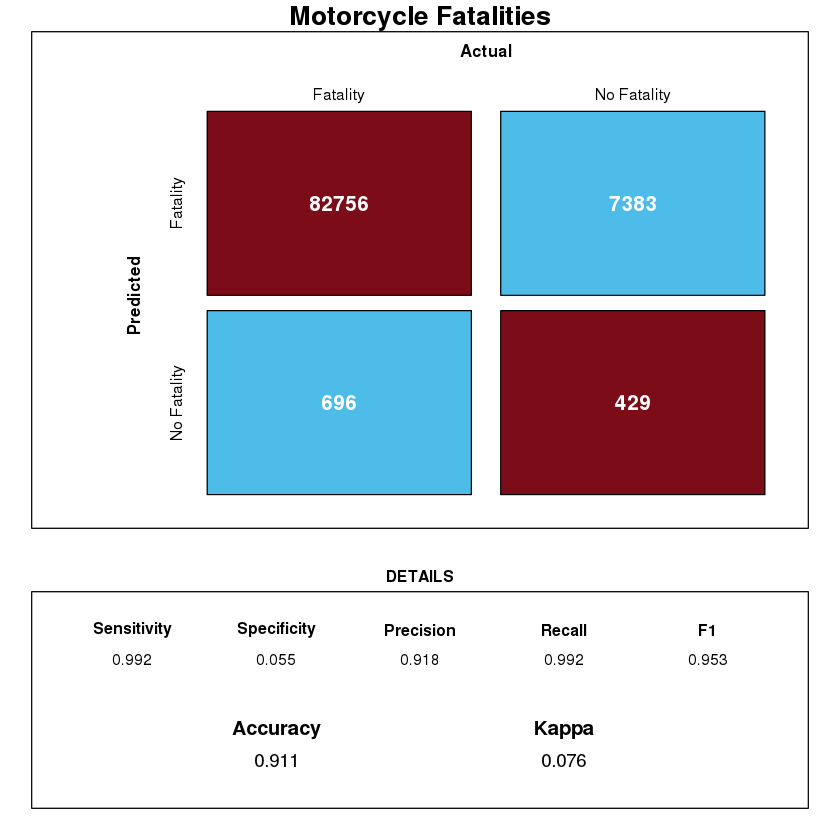

In [93]:
draw_confusion_matrix(cm)
